In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [ ]:
%cd /content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train

/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train


In [ ]:
#Import Lib requirement 
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import glob
import random
import shutil

## 1. Conver file Json to dataframe for Tfrecord

In [ ]:
def convert_json_to_df_for_tfrecord(data, class_dict):
  images = data['images']
  annotations = data['annotations']
  categories = data['categories']

  df = pd.DataFrame()
  filename = []
  class_text = []
  xmin = []
  ymin = []
  xmax = []
  ymax = []
  width = []
  height = []

  for an in annotations:
    # filename
    image_id = an['image_id']
    imageFile = str(image_id) + '.png'
    filename.append(imageFile)

    # xmin
    xmin.append(an['bbox'][0])

    # ymin
    ymin.append(an['bbox'][1])

    # xmax
    xmax.append(an['bbox'][0] + an['bbox'][2])

    # ymax
    ymax.append(an['bbox'][1] + an['bbox'][3])

    # width
    width.append(1622)

    # height
    height.append(626)

    # class
    classId = an['category_id']
    class_text.append(class_dict[classId])

  df['filename'] = filename
  df['width'] = width
  df['height'] = height
  df['class'] = class_text
  df['xmin'] = xmin
  df['ymin'] = ymin
  df['xmax'] = xmax
  df['ymax'] = ymax
  return df 

In [ ]:
def convert_json_to_df(data):
  images = data['images']
  annotations = data['annotations']
  categories = data["categories"]

  print('So luong anh trong tap du lieu la: ', len(images))
  df = pd.DataFrame()
  image_id = []
  category_id = []
  area = []
  x = []
  y = []
  w = []
  h = []

  for an in annotations:
    image_id.append(an['image_id'])
    category_id.append(an['category_id'])
    area.append(an['area'])
    x.append(an['bbox'][0])
    y.append(an['bbox'][1])
    w.append(an['bbox'][2])
    h.append(an['bbox'][3])

  df['image_id'] = image_id
  df['category_id'] = category_id
  df['area'] = area
  df['x'] = x
  df['y'] = y
  df['w'] = w
  df['h'] = h

  return df


In [ ]:
class_dict = {
    1: 'cam_nguoc_chieu',
    2: 'cam_dung_va_do',
    3: 'cam_re',
    4: 'gioi_han_toc_do',
    5: 'cam_con_lai',
    6: 'nguy_hiem',
    7: 'hieu_lenh'
}

In [ ]:
filepath = '/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train/train_traffic_sign_dataset.json'
with open(filepath, 'r') as fp:
  data = json.load(fp)
df = convert_json_to_df(data)

So luong anh trong tap du lieu la:  4500


In [ ]:
df.head()

,image_id,category_id,area,x,y,w,h
0,3,2,342,880,333,19,18
1,5,3,6889,1069,355,83,83
2,5,2,63,768,480,9,7
3,6,6,255,781,337,17,15
4,16,2,56,733,352,7,8


In [ ]:
df_tfrecord = convert_json_to_df_for_tfrecord(data, class_dict)
df_tfrecord.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,3.png,1622,626,cam_dung_va_do,880,333,899,351
1,5.png,1622,626,cam_re,1069,355,1152,438
2,5.png,1622,626,cam_dung_va_do,768,480,777,487
3,6.png,1622,626,nguy_hiem,781,337,798,352
4,16.png,1622,626,cam_dung_va_do,733,352,740,360


In [ ]:
%cd /content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train

df_tfrecord.to_csv('/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train/df_tfreocord.csv', index = False)

/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train


In [ ]:
df_ano = pd.read_csv("/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train/annotation.csv")
df_ano.head()

,area,iscrowd,image_id,bbox,category_id,box_id,file_name,height,width,street_id,supercategory
0,342,0,3,"[880, 333, 19, 18]",2,0,3.png,626,1622,3,Cấm dừng và đỗ
1,63,0,5,"[768, 480, 9, 7]",2,2,5.png,626,1622,4,Cấm dừng và đỗ
2,56,0,16,"[733, 352, 7, 8]",2,4,16.png,626,1622,3,Cấm dừng và đỗ
3,5400,0,17,"[1024, 160, 75, 72]",2,5,17.png,626,1622,8,Cấm dừng và đỗ
4,1927,0,18,"[1138, 295, 47, 41]",2,6,18.png,626,1622,3,Cấm dừng và đỗ


In [ ]:
a = df_tfrecord['filename']
image_id_list = list(set(a))

In [ ]:
len(image_id_list)

4500

In [ ]:
valid_id = random.choices(image_id_list, k = 450)
len(valid_id)

450

In [ ]:
# valid_id = [str(x) for x in valid_id]
validate_id = [x.strip() for x in valid_id]

In [ ]:
df_validate = df_tfrecord[df_tfrecord['filename'].isin(validate_id)]
df_validate.to_csv('/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train/validate.csv', index=False)

In [ ]:
df_validate = pd.read_csv("/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train/validate.csv")
len(df_validate)

999

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train/train.csv")
len(df_train)

10001

In [ ]:
df_train = df_tfrecord[~df_tfrecord['filename'].isin(validate_id)]
df_train.to_csv('/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train/train.csv', index=False)

In [ ]:
# 2. Split data to train and test
import csv

raw_data_path = '/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train/images'
train_data_path = '/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train/split_data/train1'
valid_data_path = '/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train/split_data/valid'


if not os.path.exists("/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train/split_data/"):
  os.mkdir("/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train/split_data/")


try:
  shutil.rmtree(train_data_path)
  shutil.rmtree(valid_data_path)
except:
  pass


os.mkdir(train_data_path)
os.mkdir(valid_data_path)



In [ ]:
raw_data_path = '/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train/images'
train_data_path1 = '/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train/split_data/train'
valid_data_path = '/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train/split_data/valid'


total_files = glob.glob(valid_data_path + "/*.png")
print("Total file = ", len(total_files))

Total file =  426


In [ ]:
%cd /content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train

source = raw_data_path
destination = train_data_path

with open('train.csv') as csvfile:
       reader = csv.DictReader(csvfile)
       for column in reader:
           shutil.copyfile(os.path.join(source, column['filename']), os.path.join(destination, column['filename']))

In [ ]:
%cd /content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train

source = raw_data_path
destination = valid_data_path

with open('validate.csv') as csvfile:
       reader = csv.DictReader(csvfile)
       for column in reader:
           shutil.copyfile(os.path.join(source, column['filename']), os.path.join(destination, column['filename']))

/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train


# **2. EDA on df from json**

In [ ]:
import matplotlib.patches as patches

In [ ]:
def get_all_bboxes(df, image_id):
  image_bboxes = df[df.image_id == image_id]
  bboxes=[]

  for _, row in image_bboxes.iterrows():
    bboxes.append((row.x, row.y, row.w, row.h))
  return bboxes

In [ ]:
def plot_image_examples(df, path, rows=3, cols=3, title='Image examples'):
    if rows == 1 and cols == 1:
      fig, axs = plt.subplots(rows, cols, figsize=(16,8))
      img_id = np.unique(df['image_id'])[0]
      img = cv2.imread(os.path.join(path, str(img_id) + '.png'))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      axs.imshow(img)
            
      bboxes = get_all_bboxes(df, img_id)
      for bbox in bboxes:
          cv2.rectangle(img,
                    (bbox[0], bbox[1]),
                    (bbox[0] + bbox[2],  bbox[1] + bbox[3]),
                    (220, 0, 0), 3)
      axs.axis('off')
    else:
      fig, axs = plt.subplots(rows, cols, figsize=(10,10))
      for row in range(rows):
          for col in range(cols):
              idx = np.random.randint(len(df), size=1)[0]
              img_id = df.iloc[idx].image_id
            
              img = cv2.imread(os.path.join(path, str(img_id) + '.png'))
              img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
              axs[row, col].imshow(img)
            
              bboxes = get_all_bboxes(df, img_id)
            
              for bbox in bboxes:
                rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=1,edgecolor='r',facecolor='none')
                axs[row, col].add_patch(rect)
              axs[row, col].axis('off')
           
    plt.suptitle(title)
    plt.show()

In [ ]:
df.sort_values('image_id')
df

,image_id,category_id,area,x,y,w,h
0,3,2,342,880,333,19,18
1,5,3,6889,1069,355,83,83
2,5,2,63,768,480,9,7
3,6,6,255,781,337,17,15
4,16,2,56,733,352,7,8
...,...,...,...,...,...,...,...
10995,12519,7,27300,902,290,273,100
10996,12521,2,1968,1338,173,48,41
10997,12523,2,420,800,256,20,21
10998,12523,6,336,800,281,21,16


In [ ]:
print('Số lượng bbox có trong 4500 ảnh là', len(df))
print('Vậy TB mỗi ảnh có', len(df)/4500)

Số lượng bbox có trong 4500 ảnh là 11000
Vậy TB mỗi ảnh có 2.4444444444444446


# Nhiều hình có số lượng Bbox nhiều hơn so với grouth truth thực tế, ví dụ có những hình có đến 20 bbox nhưng chỉ có 5 grouth truth => Cần lọc lại! 

In [ ]:
data['categories']

[{'id': 1, 'name': 'Cấm ngược chiều', 'supercategory': 'Cấm ngược chiều'},
 {'id': 2, 'name': 'Cấm dừng và đỗ', 'supercategory': 'Cấm dừng và đỗ'},
 {'id': 3, 'name': 'Cấm rẽ', 'supercategory': 'Cấm rẽ'},
 {'id': 4, 'name': 'Giới hạn tốc độ', 'supercategory': 'Giới hạn tốc độ'},
 {'id': 5, 'name': 'Cấm còn lại', 'supercategory': 'Cấm còn lại'},
 {'id': 6, 'name': 'Nguy hiểm', 'supercategory': 'Nguy hiểm'},
 {'id': 7, 'name': 'Hiệu lệnh', 'supercategory': 'Hiệu lệnh'}]

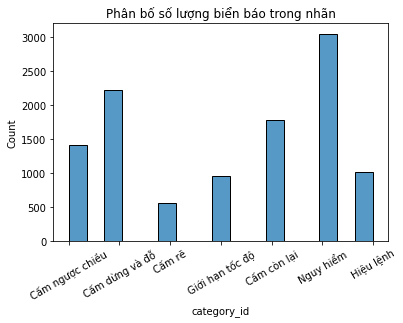

In [ ]:
sns.histplot(df['category_id'])
plt.title('Phân bố số lượng biển báo trong nhãn')
plt.xticks([1,2,3,4,5,6,7], [d['name'] for d in data['categories']], rotation=30)
plt.show()

In [ ]:
df_cat = df.groupby('category_id').size().reset_index(name='count')
df_cat.head(7)

,category_id,count
0,1,1416
1,2,2221
2,3,556
3,4,949
4,5,1787
5,6,3049
6,7,1022


In [ ]:
print("Class_Id có số bbox nhiều nhất là 6:",np.max(df_cat['count']),"bboxes")
print("Class_Id có số bbox ít nhất là 3:",np.min(df_cat['count']),"bboxes")

Class_Id có số bbox nhiều nhất là 6: 3049 bboxes
Class_Id có số bbox ít nhất là 3: 556 bboxes


In [ ]:
df_count = df.groupby('image_id').size().reset_index(name='count')
df_count.head()

,image_id,count
0,3,1
1,5,2
2,6,1
3,16,1
4,17,1


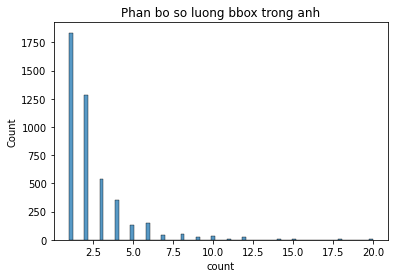

In [ ]:
sns.histplot(df_count['count'])
plt.title("Phan bo so luong bbox trong anh")
plt.show()

In [ ]:
print('Hầu hết các ảnh có từ 1-2 bbox')
maxId = df_count['count'].idxmax()
print('Ảnh với số lượng nhiều bbox nhất là ảnh với ID', df_count['image_id'][maxId], 'với', df_count['count'][maxId], 'bbox')

Hầu hết các ảnh có từ 1-2 bbox
Ảnh với số lượng nhiều bbox nhất là ảnh với ID 8916 với 20 bbox


In [ ]:
df_max_box = df[df['image_id'] == 8916]
df_max_box.head()

,image_id,category_id,area,x,y,w,h
6805,8916,2,81,983,314,9,9
6806,8916,4,240,809,231,15,16
6807,8916,4,169,828,231,13,13
6808,8916,2,256,844,230,16,16
6809,8916,5,156,846,248,12,13


In [ ]:
print(len(df_max_box))

20


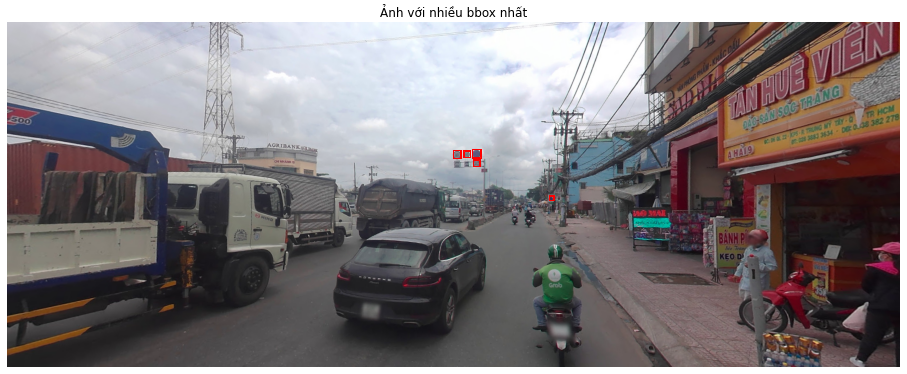

In [ ]:
raw_data_path = '/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train/images'
fig, axs = plt.subplots(1,1, figsize=(16,8))
img_id = np.unique(df_max_box['image_id'])[0]
img = cv2.imread(os.path.join(raw_data_path, str(img_id) + '.png'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
axs.imshow(img)
            
bboxes = get_all_bboxes(df_max_box, img_id)
for bbox in bboxes:
  rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=1,edgecolor='r',facecolor='none')
  axs.add_patch(rect)
axs.axis('off')
plt.title('Ảnh với nhiều bbox nhất')
plt.show()

In [ ]:
num_img_many_bbox = len(df_count[df_count['count']>=10])
print(f'Tổng cộng có', num_img_many_bbox, 'có trên 10 bbox trở lên')

Tổng cộng có 85 có trên 10 bbox trở lên


# Có nhiều bbox rất nhỏ, trong thực tế ta không cần thiết phát hiện những bbox như vậy => Cần lọc bớt!

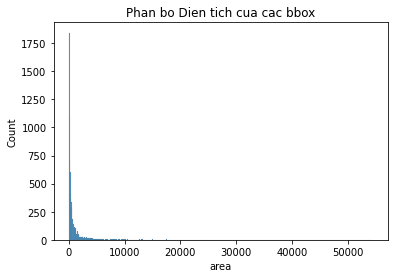

In [ ]:
sns.histplot(df['area'])
plt.title("Phan bo Dien tich cua cac bbox")
plt.show()

In [ ]:
image_area = 1622*626

area_max = df['area'].max()
area_min = df['area'].min()

print('Bbox co dien tich lon nhat la', area_max,'chiem', area_max/image_area*100, '%    tong dien tich hinh')
print('Bbox co dien tich be nhat la', area_min, 'chiem', area_min/image_area*100, '%    tong dien tich hinh')

Bbox co dien tich lon nhat la 54526 chiem 5.3700515673073514 %    tong dien tich hinh
Bbox co dien tich be nhat la 4 chiem 0.0003939442883987346 %    tong dien tich hinh


In [ ]:
df[df['area'] == df['area'].max()]['image_id']

4916    6300
Name: image_id, dtype: int64

In [ ]:
a = df['area'].mean()
print("Dien tich trung binh cua cac bbox trong tap du lieu:", a, "%")

b = a/image_area
print("Ti le trung binh cua cac Bbox so voi dien tich hinh", b,"%")

Dien tich trung binh cua cac bbox trong tap du lieu: 1064.5397272727273 %
Ti le trung binh cua cac Bbox so voi dien tich hinh 0.0010484233633315941 %


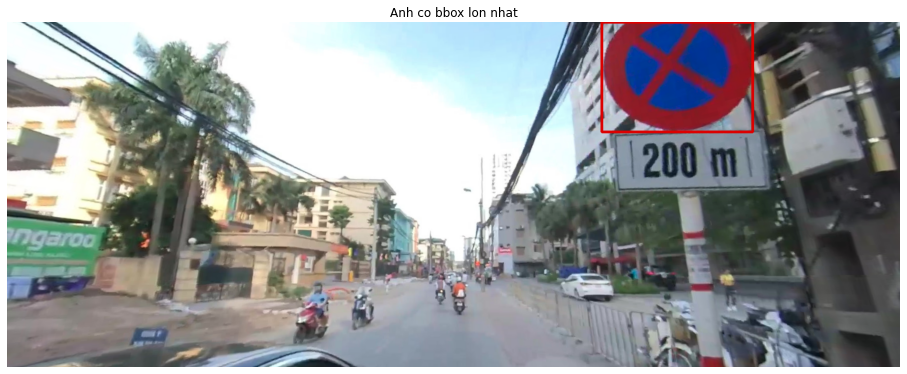

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

im = cv2.imread('/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train/images/6300.png', cv2.IMREAD_COLOR)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

cv2.rectangle(im,
              (df.iloc[4916]['x'], df.iloc[4916]['y']),
              (df.iloc[4916]['x'] + df.iloc[4916]['w'], df.iloc[4916]['y'] + df.iloc[4916]['h']),
              (220,0,0),3)

ax.set_axis_off()
ax.imshow(im)
plt.title("Anh co bbox lon nhat")
plt.show()

In [ ]:
df[df['area'] == df['area'].min()]['image_id']

8119    10504
Name: image_id, dtype: int64

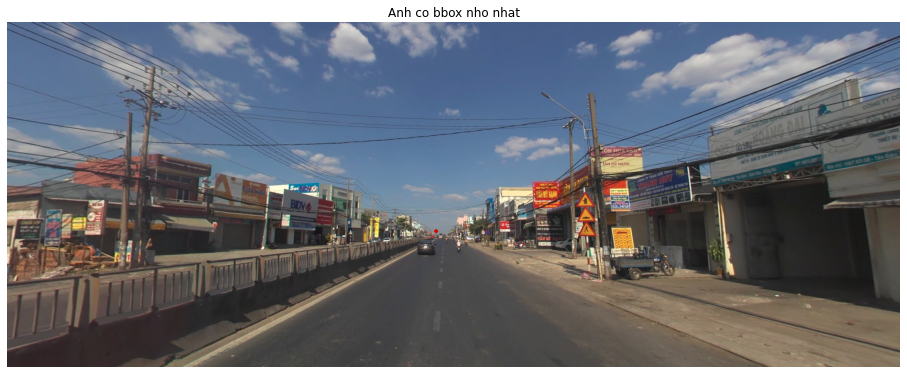

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

im2 = cv2.imread('/content/drive/MyDrive/TrafficSignDetection/Dataset/traffic_train/images/10504.png', cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

cv2.rectangle(im2,
              (df.iloc[8119]['x'], df.iloc[8119]['y']),
              (df.iloc[8119]['x'] + df.iloc[8119]['w'], df.iloc[8119]['y'] + df.iloc[8119]['h']),
              (220,0,0),3)

ax.set_axis_off()
ax.imshow(im2)
plt.title("Anh co bbox nho nhat")
plt.show()

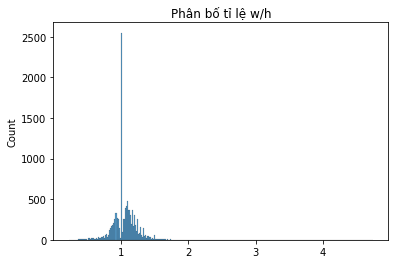

In [ ]:
sns.histplot(df['w']/df['h'])
plt.title('Phân bố tỉ lệ w/h')
plt.show()